In [62]:
from serpapi import GoogleSearch
import requests
from bs4 import BeautifulSoup
import re
import openai

In [63]:
def search(query):

  hl =  "en"
  gl = "us"
  key = ""

  params = {
    "q": query,
    "hl": hl,
    "gl": gl,
    "api_key": key
  }

  search = GoogleSearch(params)
  results = search.get_dict()

  links = []
  for i in results["organic_results"]:
      links.append(i['link'])
  print(links)
  return links

In [64]:
def scrape(url):

    r1 = requests.get(url)
    r1.status_code
    coverpage = r1.content
    soup = BeautifulSoup(coverpage)
    content = soup.find("body").find_all('p')

    x = ''
    for i in content:
        x = x + i.getText().replace('\n', '')

    x = re.sub(r'==.*?==+', '', x)
    
    return x

In [65]:
# prompt = """Given the following question:'"""+q+"""'

#         Extract the text from the following content relevant to the question and summarize in detail:

#         '"""+txt+"""'

#         Extracted summarized content:"""

In [66]:
# prompt = """You are a professional copywriter. You are given some text extracted from an article about the topic:'"""+q+"""'

# Thoroughly read the following text and write a detailed summary:

# '"""+content[0]['text']+"""'

# Summarized content:"""

# print(prompt)

In [67]:
def gpt(prompt):
    openai.api_key = ""
    r = openai.Completion.create(model="text-davinci-002", prompt=prompt, temperature=0.2, max_tokens=400)
    response = r.choices[0]['text']

    return response

In [68]:
def process(q):
    
    links = search(q)
    results = []

    for i in links[:3]:

        txt = scrape(i)[:1000]
        print(txt)
        print(' --- frog ---')
        if len(txt) < 300:
            continue

        prompt = """Here is some text about the topic:'"""+q+"""'

        Thoroughly read the following and write a detailed summary:

        '"""+txt+"""'

        Summarized content:"""

        a = {
            'query': q,
            'link': i,
            'text': txt,
            'summary': gpt(prompt).strip("\n")
        }
        
        results.append(a)
    print(len(results))
    print('--- duck ---')
    return results

In [83]:
q = 'difference between gaussian and bayesian'

In [84]:
data = process(q)
# data

https://serpapi.com/search
['https://www.quora.com/What-is-the-difference-between-Gaussian-and-Bayesian', 'https://jonathan-hui.medium.com/bayesian-linear-regression-gaussian-process-with-normal-distribution-e686f7846ad1', 'https://stats.stackexchange.com/questions/503213/frequentist-vs-bayesian-approaches-to-gaussian-processes', 'https://www.youtube.com/watch?v=yBaK9CV1qbU', 'https://www.youtube.com/watch?v=H3EjCKtlVog', 'https://www.cs.cornell.edu/courses/cs4787/2019sp/notes/lecture16.pdf', 'https://www.sciencedirect.com/science/article/pii/S0048969721068364', 'https://gregorygundersen.com/blog/2019/04/04/bayesian-gaussian/', 'https://sites.astro.caltech.edu/~george/aybi199/OldLectures/Lec17_Moghaddam.pdf', 'https://www.fil.ion.ucl.ac.uk/~wpenny/course/bayes.pdf']
Something went wrong. Wait a moment and try again.
 --- frog ---
Mar 7In the last article, we learn the normal distribution properties that are central to Machine Learning (ML). Here, we will apply our knowledge in manipula

In [85]:
def output(data):

    print('\033[1m' + 'Query:' + '\033[0m', "\x1B[3m" + q + "\x1B[0m")
    print('\033[1m' + 'Results: ' + '\033[0m')

    for i in data:
        print('')
        # print('\033[1m' + '' + '\033[0m',)
        print(" - '"+i['summary'].strip()+"'")
        print('['+"\x1B[3m" + '\033[1m' + 'source:' + '\033[0m', i['link'] + "\x1B[0m"+']')
        print('')

In [86]:
output(data)

Query: difference between gaussian and bayesian
Results: 

 - 'The article discusses the difference between Gaussian and Bayesian methods for solving machine learning problems. Bayesian linear regression is described as taking advantage of the 'convenience' of normal distribution operations to solve the regression problem analytically. The posterior distribution is then discussed, with a focus on how to merge normal distributions to obtain the desired result.'
[source: https://jonathan-hui.medium.com/bayesian-linear-regression-gaussian-process-with-normal-distribution-e686f7846ad1]


 - 'The author of the blog post discusses the difference between Gaussian Processes (GP) and Bayesian inference. He uses the terms "prior", "posterior", and "95% confidence interval" to explain the concepts. It is difficult to tell if the author is a Bayesian or a Frequentist, but the blog post is helpful in understanding the difference between the two methods.'
[source: https://stats.stackexchange.com/que

In [73]:
# import wikipedia
# # Specify the title of the Wikipedia page
# wiki = wikipedia.page('What is Convexity')
# # Extract the plain text content of the page
# text = wiki.content

# text = re.sub(r'==.*?==+', '', text)
# text = text.replace('\n', '')
# text

# wiki.url

In [74]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

# chrome_options = webdriver.ChromeOptions()
# chrome_options.set_capability('browserless:token', '100a7c4c-1b4d-46cb-bd9c-1b39fe22cbe3')
# chrome_options.add_argument("--no-sandbox")
# chrome_options.add_argument("--headless")

# driver = webdriver.Remote(
#   command_executor='https://chrome.browserless.io/webdriver',
#   desired_capabilities=chrome_options.to_capabilities()
# )

# driver.get("https://www.nytimes.com/2022/11/10/business/economy/october-inflation-data.html")
# x = driver.find_elements(By.TAG_NAME, "p")
# for i in x:
#   print(i.text)
# driver.quit()

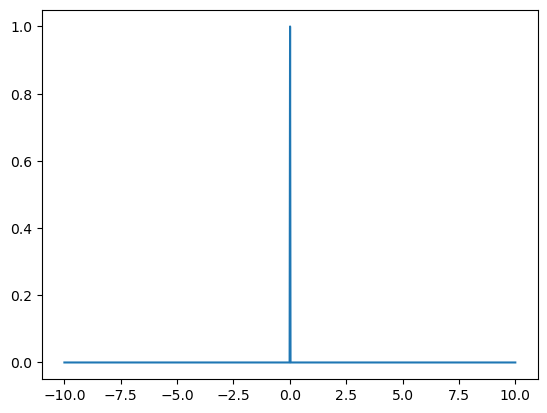

In [91]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = np.zeros(1000)
y[500] = 1

plt.plot(x, y)
plt.show()